In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("StudentsPerformance.csv")

In [9]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# If any, fill or drop
# df.fillna(method='ffill', inplace=True) # or use df.dropna()

Missing values per column:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [63]:
df.isnull()#returns true for missing values in Dataframe

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,sqrt_math_score,sqrt_reading_score
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False


In [65]:
df.notnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,sqrt_math_score,sqrt_reading_score
0,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...
995,True,True,True,True,True,True,True,True,True,True
996,True,True,True,True,True,True,True,True,True,True
997,True,True,True,True,True,True,True,True,True,True
998,True,True,True,True,True,True,True,True,True,True


In [67]:
#Fill missing values with column mean (you could also use median)
df['math score'] = df['math score'].fillna(df['math score'].mean())


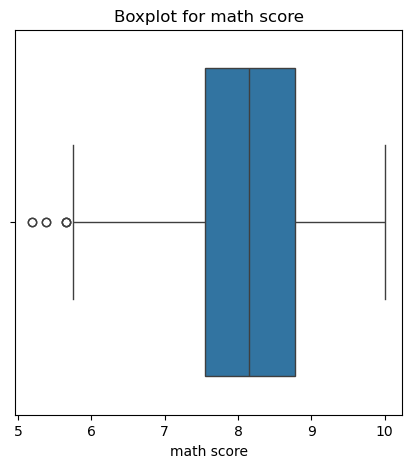

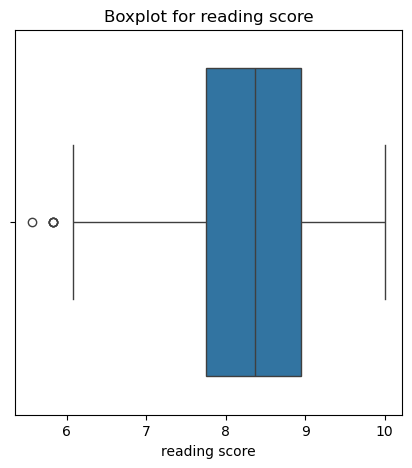

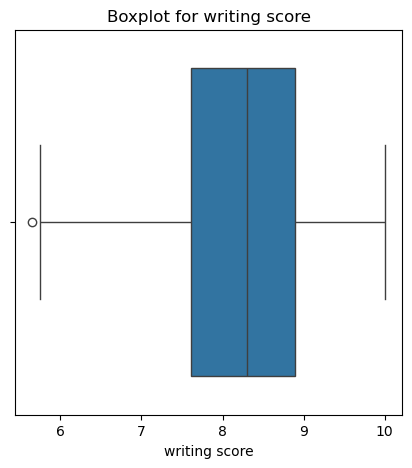

In [73]:
#Step 2: Scan Numeric Variables for Outliers
#We can detect outliers using boxplots and also compute outliers using IQR. OR Scatterplot
# Numeric columns

numeric_cols = ['math score', 'reading score', 'writing score']

# Boxplots
for col in numeric_cols:
    plt.figure(figsize=(5, 2))#width=5 inches ,Height=2 inches
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


What to Check in a Boxplot (for outliers and more):
1. Outliers
Dots or stars outside the "whiskers" (horizontal lines extending from the box) are outliers.
These values lie outside 1.5 × IQR (Interquartile Range).
If you see points far outside, those are potential outliers.
2. Whiskers
They show the minimum and maximum non-outlier data points.
They help you see the range of most data.
3. Box (IQR)
The box represents the middle 50% of data (from Q1 to Q3).
Helps detect skewness:
Center line closer to bottom → Right-skewed
Center line closer to top → Left-skewed
4. Median Line
The line inside the box shows the median (Q2).
If not centered, it indicates skewness.



In [27]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Remove outliers in each numeric column
for col in numeric_cols:
    df = remove_outliers(df, col)

# Final cleaned data
print("\nCleaned DataFrame:\n", df)



Cleaned DataFrame:
      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72   

Purpose:
To remove outliers from each numeric column using the IQR method.
How it works:
Q1 and Q3 are the 25% and 75% percentiles.
IQR = Q3 - Q1 → Range of middle 50% data.
Lower bound = Q1 - 1.5 × IQR, Upper bound = Q3 + 1.5 × IQR
Keep only values within the bounds; remove the rest (outliers). Quantile:
Quantiles divide your data into equal parts.
For example:
0.25 quantile means 25% of the data is less than or equal to this value.
0.50 quantile is the median (middle value).
0.75 quantile means 75% of the data is less than or equal to it.
Quartile (a type of quantile):
Quartiles split data into 4 equal parts:
Q1 (25th percentile): 25% of data is below this value
Q2 (50th percentile): Median (middle of the data)
Q3 (75th percentile): 75% of data is below this value



In [33]:
#Apply data transformations on at least one of the variables. The purpose of this transformation 
#should be one of the following reasons: to change the scale for better understanding of the variable, to 
#convert a non-linear relation into a linear one, or to decrease the skewness and convert the 
#distribution into a normal distribution. 

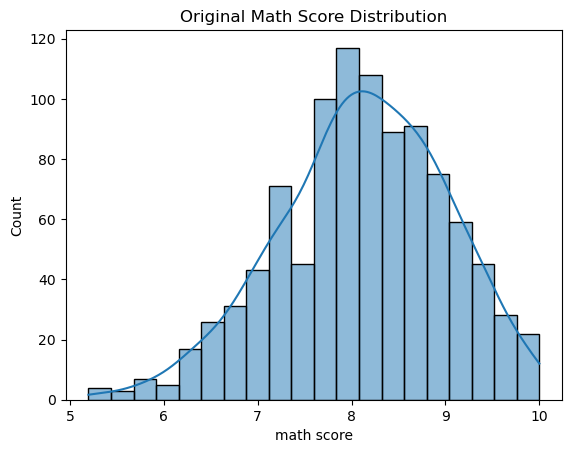

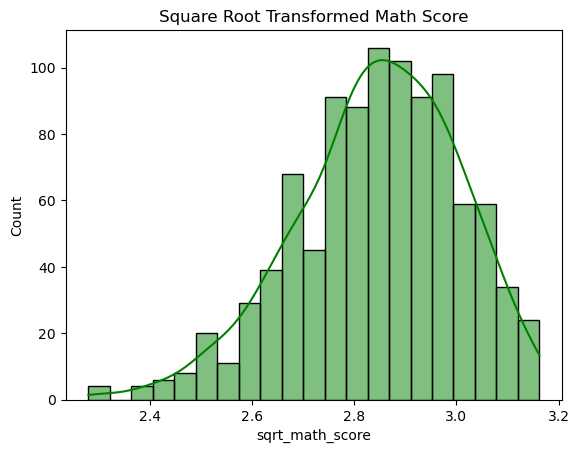

In [81]:
#Data Transformation** is the process of converting data into a suitable format for analysis, such as scaling or encoding.
#Example:** Converting "Male"/"Female" to 0/1 or scaling marks from 0–100 to 0–1 range.
#Square Root Transformation (easier than log):

# Before transformation
sns.histplot(df['math score'], kde=True)#The kde=True argument adds a Kernel Density Estimate (KDE) curve over the histogram, 
#which represents the probability density of the data(underlying data below the curve)
plt.title("Original Math Score Distribution")
plt.show()

# Apply square root transformation
df['sqrt_math_score'] = np.sqrt(df['math score'])

# After transformation
sns.histplot(df['sqrt_math_score'], kde=True, color='green')
plt.title("Square Root Transformed Math Score")
plt.show()

Square Root Transformation:
df['sqrt_math_score'] = np.sqrt(df['math score']):
This line applies a square root transformation to the 'math score' column in the dataset.
The np.sqrt() function takes each value in the 'math score' column and computes its square root.
The transformed values are stored in a new column, 'sqrt_math_score', in the dataset.



In [55]:
# Skewness before transformation
original_skew = df['math score'].skew()
print("Original Math Score Skewness:", original_skew)

# Skewness after square root transformation
transformed_skew = df['sqrt_math_score'].skew()
print("Square Root Transformed Math Score Skewness:", transformed_skew)


Original Math Score Skewness: -0.3164171229355368
Square Root Transformed Math Score Skewness: -0.47447168049125443


### Conclusion:

* The original Math Score had a slight negative skewness of -0.316, which is already relatively close to normal.
* After applying the square root transformation, the skewness slightly increased to -0.474, indicating a more pronounced negative skew.
* Overall, the transformation did not significantly improve the skewness in this case, as it made it slightly more skewed. However, the skewness still remains within an acceptable range (-0.5 to 0.5). Therefore, no major transformation was necessary, and the original data could still be used effectively for analysis.


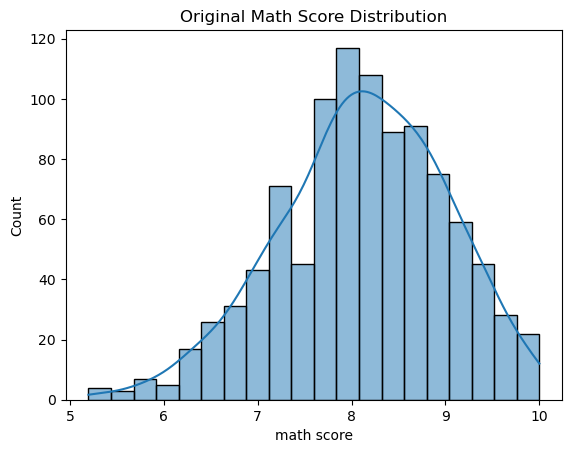

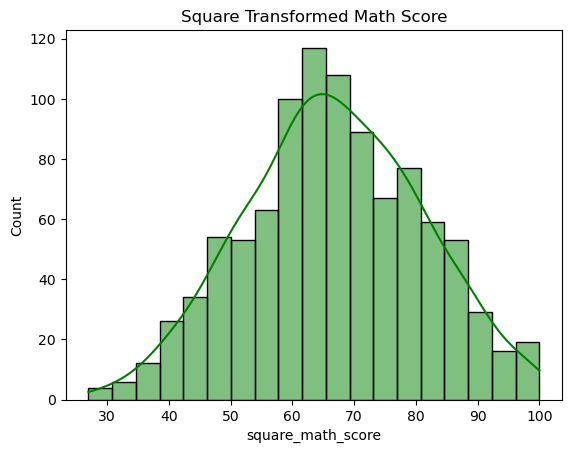

In [84]:
##Square Transformation--> reduces left skewness
# Before transformation
sns.histplot(df['math score'], kde=True)
plt.title("Original Math Score Distribution")
plt.show()

# Apply square root transformation
df['square_math_score'] = np.square(df['math score'])

# After transformation
sns.histplot(df['square_math_score'], kde=True, color='green')
plt.title("Square Transformed Math Score")
plt.show()

In [86]:
# Skewness before transformation
original_skew = df['math score'].skew()
print("Original Math Score Skewness:", original_skew)

# Skewness after square  transformation
transformed_skew = df['square_math_score'].skew()
print("Square Transformed Math Score Skewness:", transformed_skew)


Original Math Score Skewness: -0.3164171229355368
Square Transformed Math Score Skewness: -0.0259737425840342


After applying the square transformation, the skewness value becomes much closer to 0, 
indicating that the transformation has reduced the left skew and made the distribution more symmetric (less skewed). 

#np.log1p(df[column_name]) -- log transformation-->reduces right skewness